<a href="https://colab.research.google.com/github/Gabriellemga/Machine_learning/blob/main/Classifica%C3%A7%C3%A3o_valida%C3%A7%C3%A3o_modelos_metricas_avalia%C3%A7%C3%A3o/Projeto%2Binicial%2B_%2BClassifica%C3%A7%C3%A3o%2B_%2BValida%C3%A7%C3%A3o%2Be%2Bm%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Classificação: Validação de modelos e métricas de avaliação**

### Projeto

Uma empresa de empréstimo de automóveis está passando por uma situação complicada, com alta demanda para uma frota reduzida de veículos e alto número de inadimplentes, trazendo um prejuízo grande para a empresa.

Nós fomos contratados para buscar melhorias na identificação de inadimplentes. A análise dos clientes atualmente é feita de forma manual, cliente por cliente, tomando muito tempo e ainda assim a detecção de inadimplentes é muito imprecisa.

Nossa tarefa é utilizar os dados fornecidos pela empresa para **classificar** os clientes em adimplentes e inadimplentes.

## Classificando dados

### Criando um modelo inicial

In [13]:
import pandas as pd

In [14]:
dados = pd.read_csv('/content/emp_automovel.csv')
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [15]:
x = dados.drop('inadimplente', axis = 1)
y = dados['inadimplente']

In [16]:
from sklearn.tree import DecisionTreeClassifier

In [17]:
modelo = DecisionTreeClassifier()
modelo.fit(x, y)

modelo.score(x, y)

1.0

## Validando o modelo

Avaliar os modelo com base nos mesmos dados usados no treinamento não é interessante. É preciso que a avaliação seja feita em dados independentes.

Avaliar o modelo nos próprios dados de treinamento seria o análogo a entregar uma prova com as questões e o gabarito para uma pessoa e no momento de avaliá-la novamente, entregar uma prova com as mesmas questões e alternativas. É esperado que essa pessoa se sairá bem por já ter visto as respostas e ter decorado o resultado. Isso é diferente de ter aprendido a matéria a partir daquela prova e depois fazer uma prova com conteúdo parecido e ter um resultado positivo.

No intuito de checar a generalização de um modelo, devemos separar o conjunto de dados em 3 partes: dados de treinamento, validação e teste.

* o conjunto de treinamento é utilizado para treinar os modelos. Os modelos vão entender o padrão dos dados a partir desse conjunto de dados.

* o conjunto de validação é utilizado para avaliar o desempenho de diferentes modelos, com dados novos que não foram usados no treinamento do modelo.

* o conjunto de teste fica separado dos demais desde o momento inicial para simular os dados do mundo real. Ele não é utilizado em nenhum momento no treinamento e nem na validação, servindo como uma estimativa da capacidade do modelo escolhido de generalizar e prever novos dados.

In [18]:
print(f'Acurácia: {modelo.score(x, y) * 100:.2f}%')

Acurácia: 100.00%


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x, x_teste, y, y_teste = train_test_split(x, y, test_size = 0.15, stratify = y, random_state = 5)
x_treino, x_val, y_treino, y_val = train_test_split(x, y, stratify = y, random_state = 5)

In [21]:
modelo = DecisionTreeClassifier()
modelo.fit(x_treino, y_treino)

print(f'Acurácia: {modelo.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {modelo.score(x_val, y_val) * 100:.2f}%')

Acurácia: 100.00%
Acurácia de validação: 85.11%


In [22]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(x_treino, y_treino)

print(f'Acurácia: {modelo.score(x_treino, y_treino) * 100:.2f}%')
print(f'Acurácia de validação: {modelo.score(x_val, y_val) * 100:.2f}%')

Acurácia: 92.06%
Acurácia de validação: 90.60%


## Avaliando o modelo

In [23]:
from sklearn.metrics import confusion_matrix

In [24]:
y_previsto = modelo.predict(x_val)
matriz_confusao = confusion_matrix(y_val,y_previsto)
print(matriz_confusao)

[[10361   118]
 [  961    41]]


In [25]:
from sklearn.metrics import ConfusionMatrixDisplay

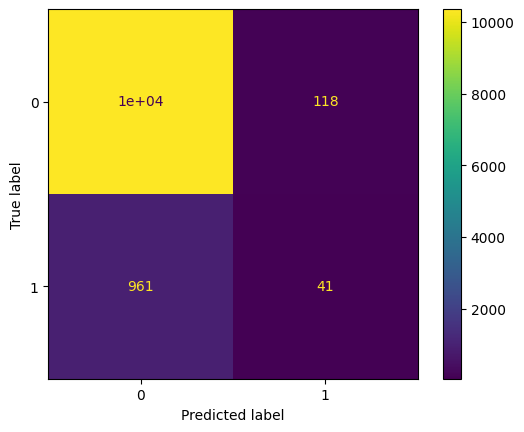

In [26]:
visualicao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao)
visualicao.plot();

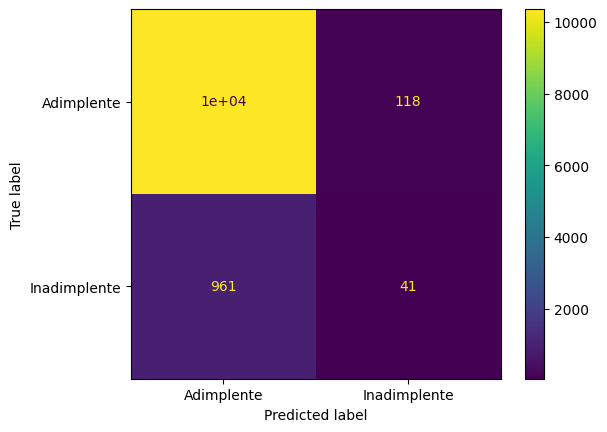

In [27]:
visualicao = ConfusionMatrixDisplay(confusion_matrix = matriz_confusao, display_labels = ['Adimplente', 'Inadimplente'])
visualicao.plot();

# Métricas de avaliação

## Acurácia, precisão e recall

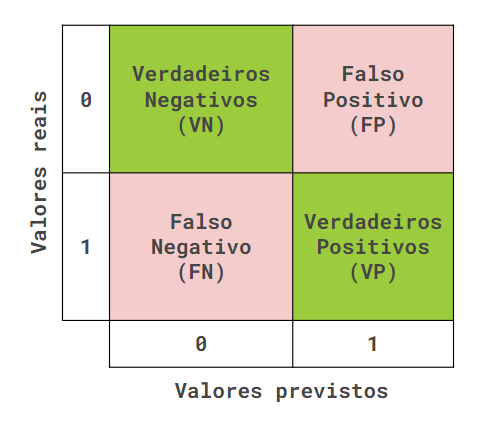

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
print(f'Acurácia: {accuracy_score(y_val, y_previsto)}')

Acurácia: 0.9060186394913335


In [30]:
from sklearn.metrics import precision_score, recall_score

In [31]:
print(f'Precisão: {precision_score(y_val, y_previsto)}')
print(f'Recall: {recall_score(y_val, y_previsto)}')

Precisão: 0.2578616352201258
Recall: 0.04091816367265469


In [32]:
from sklearn.metrics import f1_score

In [33]:
print(f'F1_score: {f1_score(y_val, y_previsto)}')

F1_score: 0.07062876830318691


## Curva ROC

In [34]:
from sklearn.metrics import RocCurveDisplay

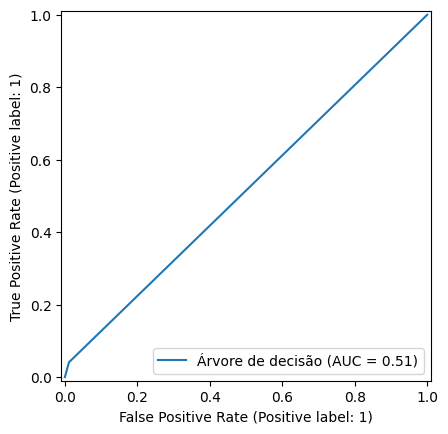

In [35]:
RocCurveDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [36]:
from sklearn.metrics import roc_auc_score

In [37]:
print(f'ROC AUC: {roc_auc_score(y_val, y_previsto)}')

ROC AUC: 0.5148287736008087


## Curva de precisão x recall

In [38]:
from sklearn.metrics import PrecisionRecallDisplay

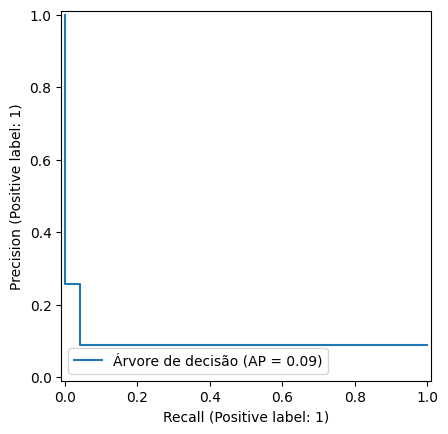

In [39]:
PrecisionRecallDisplay.from_predictions(y_val, y_previsto, name = 'Árvore de decisão');

In [40]:
from sklearn.metrics import average_precision_score

In [41]:
print(f'AP: {average_precision_score(y_val, y_previsto)}')

AP: 0.0942547347420352


## Relatório de métricas

In [42]:
from sklearn.metrics import classification_report

In [49]:
print(f'{classification_report(y_val, y_previsto)}')

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     10479
           1       0.26      0.04      0.07      1002

    accuracy                           0.91     11481
   macro avg       0.59      0.51      0.51     11481
weighted avg       0.86      0.91      0.87     11481



# Validação cruzada

## Usando o KFold

A validação do modelo de classificação a partir da separação dos dados em conjunto de treino e validação faz com que o resultado seja muito dependente dessa divisão dos dados e pode ser que, de forma aleatória, o padrão dos dados de validação sejam diferentes do padrão dos dados de treinamento, levando a sorte de ter um resultado muito melhor do que a realidade ou o azar de um resultado muito pior do que a realidade.

Levando isso em consideração, é possível utilizar a validação cruzada, uma estratégia mais consistente e bem mais utilizada nos projetos de machine learning.

Na validação cruzada, ao invés de separarmos os dados em apenas treino e validação uma única vez, dividimos os dados em várias partes de mesmo tamanho. Em cada uma dessas divisões, será utilizada uma parte para validação e todas as outras para treinamento e o processo se repete até que todas as partes sejam utilizadas para validação e o restante para treinamento.

Será gerado um modelo para cada uma dessas divisões e a avaliação de desempenho será feita tirando a média da métrica de cada modelo. Isso faz com que a dependência da separação dos dados seja eliminada, já que há uma variação maior da escolha dos dados e é retirada uma média.

Geralmente são utilizadas 5 ou 10 partes, mais do que isso não é tão necessário porque necessita de um processamento maior e valores menores já mitiga o problema da escolha dos dados.

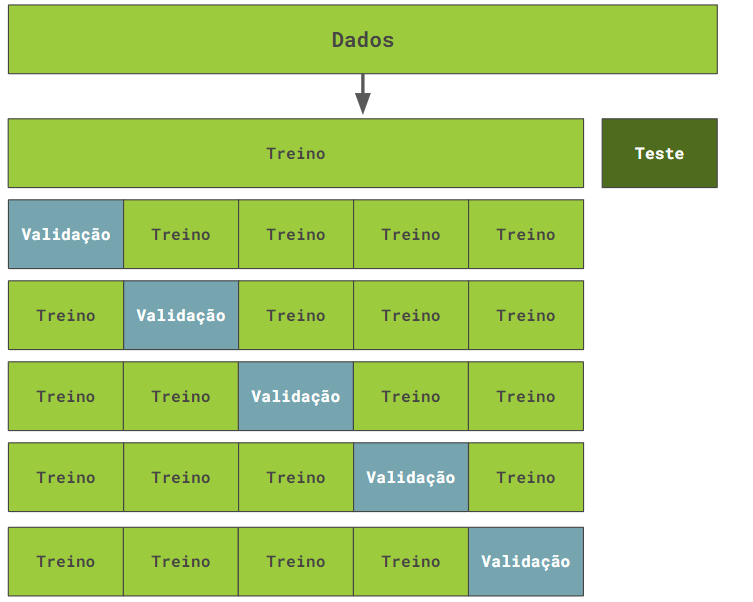

In [50]:
from sklearn.model_selection import cross_validate, KFold

In [51]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultado = cross_validate(modelo, x, y, cv = kf)
cv_resultado

{'fit_time': array([0.2439816 , 0.24823356, 0.23961639, 0.23814082, 0.23548126]),
 'score_time': array([0.00341821, 0.00491166, 0.00313711, 0.00312591, 0.00317955]),
 'test_score': array([0.91377246, 0.90799216, 0.90755662, 0.91343641, 0.89993467])}

In [52]:
cv_resultado['test_score']

array([0.91377246, 0.90799216, 0.90755662, 0.91343641, 0.89993467])

In [55]:
media = cv_resultado['test_score'].mean()
desvio_padrao = cv_resultado['test_score'].std()
print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

Intervalo de confiança: [0.8984717932837741, 0.918605133003025]


## Validação cruzada com recall

In [59]:
def intervalo_conf(resultado):
    media = resultado['test_score'].mean()
    desvio_padrao = resultado['test_score'].std()
    print(f'Intervalo de confiança: [{media - 2*desvio_padrao}, {min(media + 2*desvio_padrao, 1)}]')

In [60]:
modelo = DecisionTreeClassifier(max_depth = 10)
kf = KFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = kf, scoring = 'recall')
cv_resultados

{'fit_time': array([0.24061418, 0.24865508, 0.23272467, 0.24278665, 0.24075341]),
 'score_time': array([0.00548339, 0.00550866, 0.00530791, 0.00526929, 0.00545382]),
 'test_score': array([0.02642008, 0.01856436, 0.0196802 , 0.01827676, 0.02427746])}

In [61]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.014857446060308789, 0.028030094558625998]


## Estratificando os dados

In [62]:
dados['inadimplente'].value_counts(normalize = True)

,proportion
inadimplente,
0,0.912707
1,0.087293


In [63]:
from sklearn.model_selection import StratifiedKFold

In [64]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x, y, cv = skf, scoring = 'recall')

In [65]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.01977052511416421, 0.03909541864068088]


# Balanceamento de dados

## Oversampling

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
oversample = SMOTE()
x_balanceado, y_balanceado = oversample.fit_resample(x, y)

In [68]:
y_balanceado.value_counts(normalize = True)

,proportion
inadimplente,
0,0.5
1,0.5


In [69]:
modelo = DecisionTreeClassifier(max_depth = 10)
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(modelo, x_balanceado, y_balanceado, cv = skf, scoring = 'recall')

In [70]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6898787648481254, 0.7383033911912144]


## Pipeline para validação

In [71]:
from imblearn.pipeline import Pipeline as imbpipeline

In [72]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('oversample', SMOTE()), ('arvore', modelo)])

In [73]:
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [74]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.21576310168842067, 0.2946020590676168]


## Undersampling

In [75]:
from imblearn.under_sampling import NearMiss

In [76]:
modelo = DecisionTreeClassifier(max_depth = 10)
pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])
skf = StratifiedKFold(n_splits=5, shuffle = True, random_state = 5)
cv_resultados = cross_validate(pipeline, x, y, cv=skf, scoring = 'recall')

In [77]:
intervalo_conf(cv_resultados)

Intervalo de confiança: [0.6232977520637544, 0.7012043509807566]


## Testando o modelo

In [78]:
undersample = NearMiss(version=3)
x_balanceado, y_balanceado = undersample.fit_resample(x, y)

In [79]:
modelo = DecisionTreeClassifier(max_depth = 10)
modelo.fit(x_balanceado, y_balanceado)
y_previsto = modelo.predict(x_teste)

In [80]:
print(classification_report(y_teste, y_previsto))

              precision    recall  f1-score   support

           0       0.94      0.48      0.64      7397
           1       0.11      0.70      0.20       707

    accuracy                           0.50      8104
   macro avg       0.53      0.59      0.42      8104
weighted avg       0.87      0.50      0.60      8104



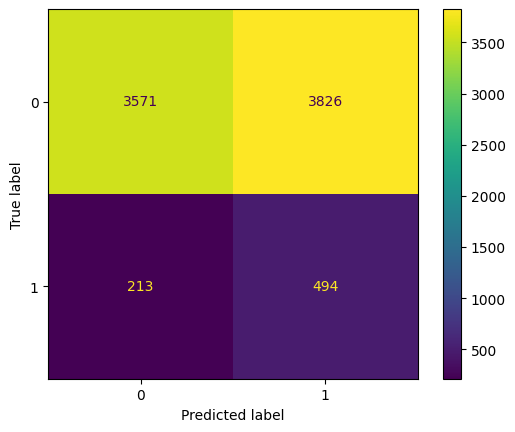

In [81]:
ConfusionMatrixDisplay.from_predictions(y_teste, y_previsto);